# Marketing Mix Modeling (MMM) - Educational Demo

## What is Marketing Mix Modeling?

**Marketing Mix Modeling (MMM)** is a statistical analysis technique used to estimate the impact of various marketing activities on sales or other business outcomes. 

### Key Characteristics:
- Uses **aggregated time-series data** (weekly, monthly, or quarterly level)
- Analyzes **historical data** to understand past performance
- Measures the **incremental impact** of each marketing channel
- Helps optimize **marketing budget allocation**

### Business Question:
**"How do different marketing channels (TV, Digital, Radio) impact sales?"**

By understanding the relationship between marketing spend and sales, businesses can:
- Determine which channels are most effective
- Calculate Return on Investment (ROI) for each channel
- Optimize future marketing budget allocation
- Forecast sales based on planned marketing activities

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Generate Synthetic Marketing Data

We'll create a synthetic dataset representing 52 weeks (1 year) of marketing data.
This simulates a realistic scenario where:
- **TV advertising** has moderate impact
- **Digital advertising** has highest impact per dollar
- **Radio advertising** has lower impact
- Random noise represents unexplained variance (external factors, measurement error, etc.)

In [2]:
# Generate synthetic weekly marketing data for 52 weeks
n_weeks = 52

# Create dataframe with week numbers
data = pd.DataFrame({
    'week': range(1, n_weeks + 1)
})

# Generate marketing spend for each channel (in dollars)
# TV spend: $10,000 - $50,000 per week
data['tv_spend'] = np.random.uniform(10000, 50000, n_weeks)

# Digital spend: $5,000 - $30,000 per week
data['digital_spend'] = np.random.uniform(5000, 30000, n_weeks)

# Radio spend: $3,000 - $20,000 per week
data['radio_spend'] = np.random.uniform(3000, 20000, n_weeks)

# Generate sales based on realistic relationship with marketing spend
# Formula: sales = base_sales + (tv_effect * tv_spend) + (digital_effect * digital_spend) + (radio_effect * radio_spend) + noise
base_sales = 50000  # Base sales without any marketing
tv_effect = 1.5     # $1.50 sales lift per $1 TV spend
digital_effect = 2.0  # $2.00 sales lift per $1 digital spend
radio_effect = 0.8    # $0.80 sales lift per $1 radio spend

# Calculate sales with random noise (standard deviation = $5,000)
noise = np.random.normal(0, 5000, n_weeks)
data['sales'] = (base_sales + 
                 tv_effect * data['tv_spend'] + 
                 digital_effect * data['digital_spend'] + 
                 radio_effect * data['radio_spend'] + 
                 noise)

# Round all numeric columns to 2 decimal places for cleaner display
data = data.round(2)

# Display basic information
print(f"Dataset shape: {data.shape}")
print(f"\nFirst 10 rows of the dataset:")
print("="*80)
data.head(10)

Dataset shape: (52, 5)

First 10 rows of the dataset:


,week,tv_spend,digital_spend,radio_spend,sales
0,1,24981.60,28487.47,18428.63,164904.37
1,2,48028.57,27370.68,7237.97,186334.27
2,3,39279.76,19947.50,9976.51,160751.00
3,4,33946.34,28046.86,15844.37,165141.78
4,5,16240.75,7212.31,6889.57,101311.37
5,6,16239.78,9899.57,4308.66,90596.49
6,7,12323.34,6130.68,7925.77,90021.29
7,8,44647.05,13133.26,5740.76,158781.97
8,9,34044.60,14716.93,18804.86,140591.97
9,10,38322.90,11783.73,16738.05,141610.75


In [3]:
# Display summary statistics
print("Summary Statistics:")
print("="*80)
data.describe().round(2)

Summary Statistics:


,week,tv_spend,digital_spend,radio_spend,sales
count,52.00,52.00,52.00,52.00,52.00
mean,26.50,28493.01,16763.43,11315.00,135686.15
std,15.15,11825.97,7464.24,5185.80,24205.89
min,1.00,10823.38,5138.05,3118.19,90021.29
25%,13.75,17379.68,9950.81,7104.34,118954.19
50%,26.50,27924.45,17075.13,10178.41,138215.86
75%,39.25,37607.71,23435.02,16729.37,154203.32
max,52.00,48796.39,29672.17,19756.06,186334.27


## 3. Exploratory Data Analysis (EDA)

Let's visualize the relationships between marketing spend and sales to understand:
- How each channel correlates with sales
- Sales trends over time
- Overall correlations between all variables

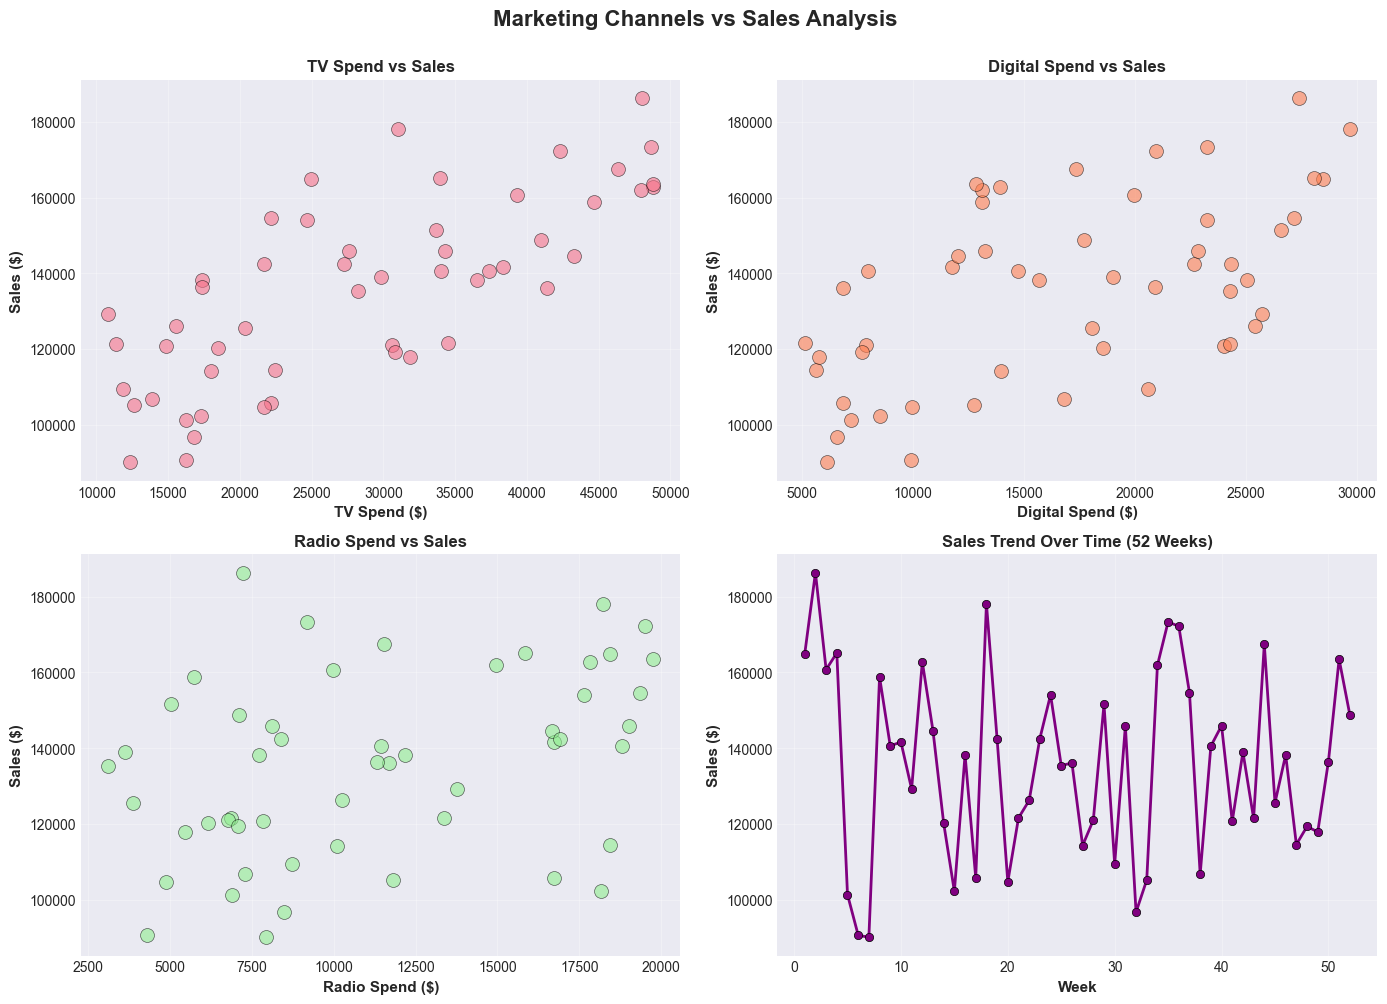


 Observation: Look for positive relationships (upward trends) in the scatter plots.
   Stronger positive trends indicate stronger impact of that channel on sales.


In [4]:
# Create a 2x2 subplot showing relationships between marketing channels and sales
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Marketing Channels vs Sales Analysis', fontsize=16, fontweight='bold', y=1.00)

# Plot 1: TV Spend vs Sales
axes[0, 0].scatter(data['tv_spend'], data['sales'], alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('TV Spend ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Sales ($)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('TV Spend vs Sales', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Digital Spend vs Sales
axes[0, 1].scatter(data['digital_spend'], data['sales'], alpha=0.6, s=100, 
                   color='coral', edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Digital Spend ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Sales ($)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Digital Spend vs Sales', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Radio Spend vs Sales
axes[1, 0].scatter(data['radio_spend'], data['sales'], alpha=0.6, s=100, 
                   color='lightgreen', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Radio Spend ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Sales ($)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Radio Spend vs Sales', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Sales Over Time
axes[1, 1].plot(data['week'], data['sales'], marker='o', linewidth=2, 
                markersize=6, color='purple', markeredgecolor='black', markeredgewidth=0.5)
axes[1, 1].set_xlabel('Week', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Sales ($)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Sales Trend Over Time (52 Weeks)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Observation: Look for positive relationships (upward trends) in the scatter plots.")
print("   Stronger positive trends indicate stronger impact of that channel on sales.")

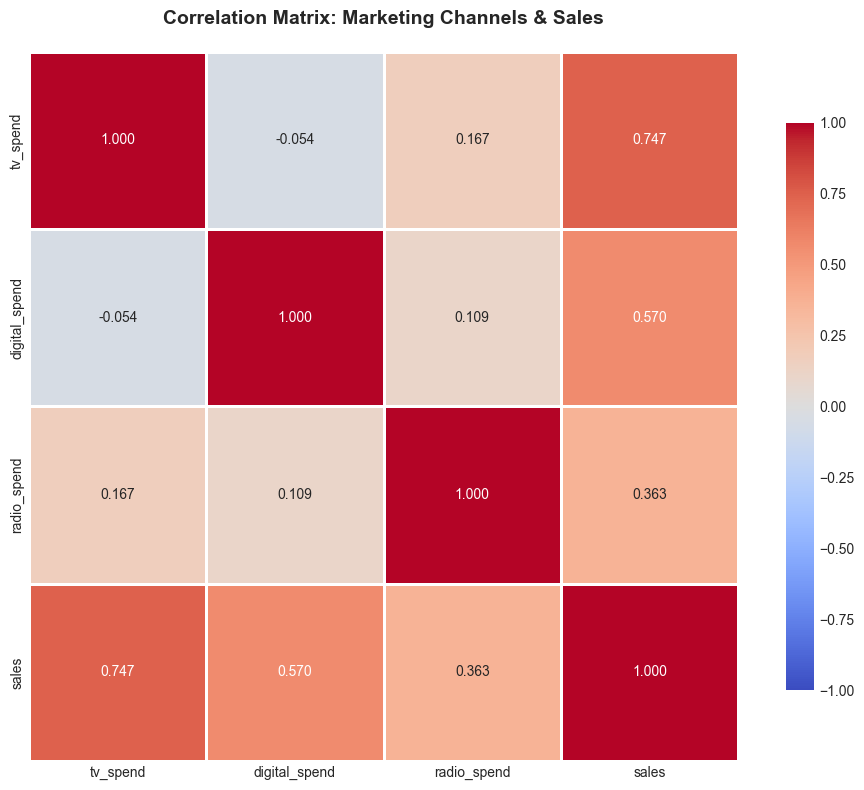


 Correlation Interpretation:
   • Values close to +1: Strong positive correlation
   • Values close to 0: Weak/no correlation
   • Values close to -1: Strong negative correlation

   Higher correlation with sales indicates stronger predictive power!


In [5]:
# Create correlation matrix heatmap
plt.figure(figsize=(10, 8))

# Calculate correlation matrix
correlation_matrix = data[['tv_spend', 'digital_spend', 'radio_spend', 'sales']].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix: Marketing Channels & Sales', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n Correlation Interpretation:")
print("   • Values close to +1: Strong positive correlation")
print("   • Values close to 0: Weak/no correlation")
print("   • Values close to -1: Strong negative correlation")
print("\n   Higher correlation with sales indicates stronger predictive power!")

## 4. Build Marketing Mix Model (MMM)

We'll use **Linear Regression** to model the relationship between marketing spend and sales.

### Model Formula:
$$\text{Sales} = \beta_0 + \beta_1 \times \text{TV Spend} + \beta_2 \times \text{Digital Spend} + \beta_3 \times \text{Radio Spend} + \epsilon$$

Where:
- $\beta_0$ = Base sales (intercept)
- $\beta_1, \beta_2, \beta_3$ = Coefficients representing the impact of each channel
- $\epsilon$ = Random error term

In [6]:
# Prepare features (X) and target (y)
X = data[['tv_spend', 'digital_spend', 'radio_spend']]
y = data['sales']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate performance metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Display model results
print("="*80)
print("MARKETING MIX MODEL RESULTS")
print("="*80)
print(f"\n Model Performance Metrics:")
print(f"   • R² Score: {r2:.4f}")
print(f"     → Interpretation: {r2*100:.2f}% of sales variance is explained by marketing spend")
print(f"\n   • Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"     → Interpretation: On average, predictions are off by ${mae:,.2f}")
print(f"\n   • Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"     → Interpretation: Typical prediction error is ${rmse:,.2f}")

print("\n" + "="*80)
print("Model Coefficients (Impact of Each Marketing Channel):")
print("="*80)
print(f"\n   Intercept (Base Sales): ${model.intercept_:,.2f}")
print(f"   → This is the expected sales with $0 marketing spend\n")

# Display coefficients for each channel
channels = ['TV', 'Digital', 'Radio']
coefficients = model.coef_

for channel, coef in zip(channels, coefficients):
    print(f"   {channel} Spend Coefficient: {coef:.4f}")
    print(f"   → For every $1 spent on {channel}, sales increase by ${coef:.2f}")
    print(f"   → For every $10,000 spent on {channel}, sales increase by ${coef*10000:,.2f}\n")

print("="*80)

MARKETING MIX MODEL RESULTS

 Model Performance Metrics:
   • R² Score: 0.9603
     → Interpretation: 96.03% of sales variance is explained by marketing spend

   • Mean Absolute Error (MAE): $4,079.86
     → Interpretation: On average, predictions are off by $4,079.86

   • Root Mean Squared Error (RMSE): $4,779.24
     → Interpretation: Typical prediction error is $4,779.24

Model Coefficients (Impact of Each Marketing Channel):

   Intercept (Base Sales): $50,645.77
   → This is the expected sales with $0 marketing spend

   TV Spend Coefficient: 1.5351
   → For every $1 spent on TV, sales increase by $1.54
   → For every $10,000 spent on TV, sales increase by $15,350.69

   Digital Spend Coefficient: 1.9165
   → For every $1 spent on Digital, sales increase by $1.92
   → For every $10,000 spent on Digital, sales increase by $19,165.13

   Radio Spend Coefficient: 0.8108
   → For every $1 spent on Radio, sales increase by $0.81
   → For every $10,000 spent on Radio, sales increase b

## 5. Model Visualizations

Visual representations help stakeholders understand:
1. **Relative impact** of each marketing channel
2. **Model accuracy** through actual vs predicted comparison

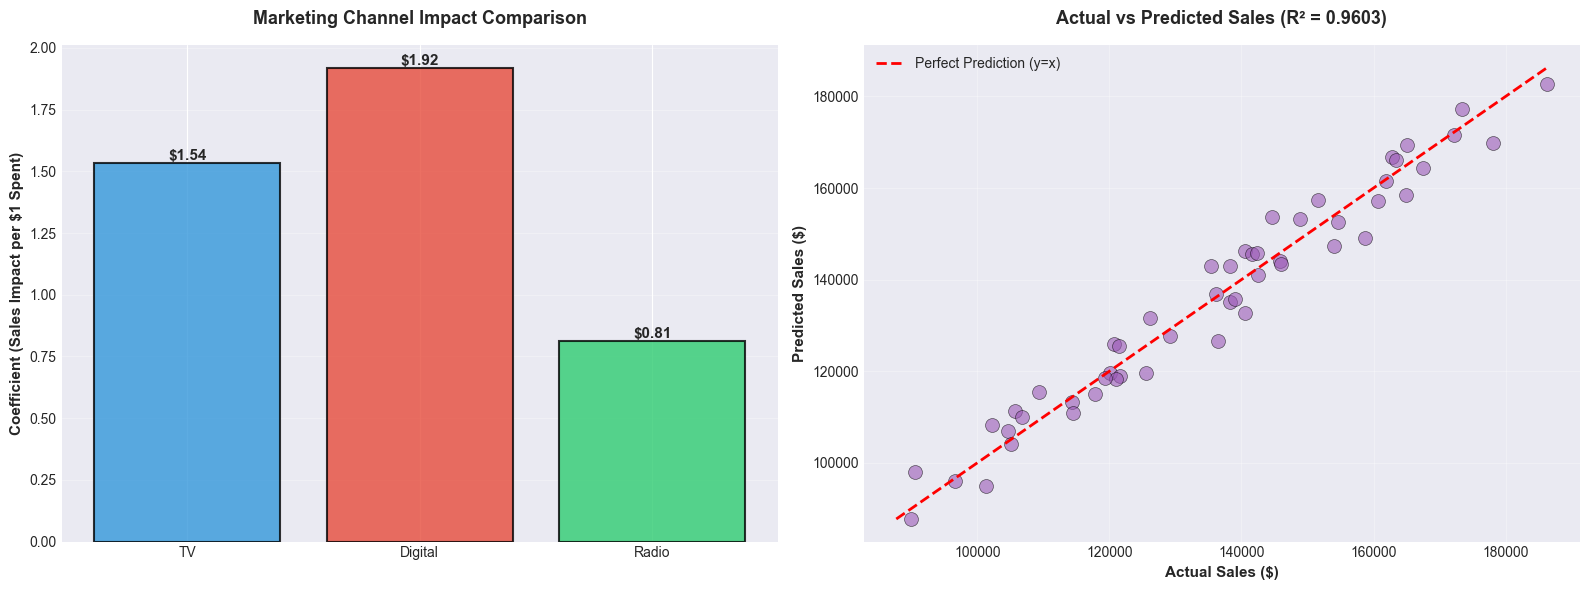


Visualization Insights:
   Left Chart: Higher bars indicate greater sales impact per dollar spent
   Right Chart: Points closer to the red line indicate better model predictions


In [7]:
# Visualization 1: Bar chart showing coefficient (impact) of each marketing channel
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Coefficient comparison
channels = ['TV', 'Digital', 'Radio']
coefficients = model.coef_
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = axes[0].bar(channels, coefficients, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0].set_ylabel('Coefficient (Sales Impact per $1 Spent)', fontsize=11, fontweight='bold')
axes[0].set_title('Marketing Channel Impact Comparison', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for bar, coef in zip(bars, coefficients):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'${coef:.2f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right plot: Actual vs Predicted Sales
axes[1].scatter(y, y_pred, alpha=0.6, s=100, edgecolors='black', linewidth=0.5, color='#9b59b6')

# Add perfect prediction line (y=x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction (y=x)')

axes[1].set_xlabel('Actual Sales ($)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Predicted Sales ($)', fontsize=11, fontweight='bold')
axes[1].set_title(f'Actual vs Predicted Sales (R² = {r2:.4f})', fontsize=13, fontweight='bold', pad=15)
axes[1].legend(loc='upper left', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization Insights:")
print("   Left Chart: Higher bars indicate greater sales impact per dollar spent")
print("   Right Chart: Points closer to the red line indicate better model predictions")

## 6. Business Insights & ROI Analysis

Now let's translate our model results into actionable business insights.

In [8]:
# Calculate ROI metrics for business insights
print("="*80)
print("BUSINESS INSIGHTS & ROI ANALYSIS")
print("="*80)

# Sort channels by coefficient (ROI)
channel_roi = list(zip(channels, coefficients))
channel_roi_sorted = sorted(channel_roi, key=lambda x: x[1], reverse=True)

print("\nChannel Ranking by ROI (Sales lift per $1 spent):")
print("   " + "-"*70)
for i, (channel, roi) in enumerate(channel_roi_sorted, 1):
    print(f"   {i}. {channel:10s}: ${roi:.4f} sales per $1 spent (ROI: {(roi-1)*100:+.2f}%)")

best_channel = channel_roi_sorted[0][0]
best_roi = channel_roi_sorted[0][1]

print(f"\nRECOMMENDATION: {best_channel} advertising provides the highest ROI!")

# Calculate expected sales lift from $10,000 additional spend
additional_spend = 10000
print(f"\n💰 Expected Sales Lift from ${additional_spend:,} Additional Spend:")
print("   " + "-"*70)

for channel, coef in zip(channels, coefficients):
    sales_lift = coef * additional_spend
    roi_pct = (sales_lift / additional_spend - 1) * 100
    print(f"   {channel:10s}: ${sales_lift:,.2f} sales lift (Net gain: ${sales_lift - additional_spend:,.2f})")

# Example calculation walkthrough
print("\nExample Calculation:")
print("   " + "-"*70)
example_channel = channels[1]  # Digital
example_coef = coefficients[1]
example_spend = 15000
example_lift = example_coef * example_spend

print(f"   If we spend ${example_spend:,} on {example_channel}:")
print(f"   Expected Sales Lift = Coefficient × Spend")
print(f"                       = {example_coef:.4f} × ${example_spend:,}")
print(f"                       = ${example_lift:,.2f}")
print(f"   Net Profit = ${example_lift:,.2f} - ${example_spend:,} = ${example_lift - example_spend:,.2f}")

print("\n" + "="*80)

BUSINESS INSIGHTS & ROI ANALYSIS

Channel Ranking by ROI (Sales lift per $1 spent):
   ----------------------------------------------------------------------
   1. Digital   : $1.9165 sales per $1 spent (ROI: +91.65%)
   2. TV        : $1.5351 sales per $1 spent (ROI: +53.51%)
   3. Radio     : $0.8108 sales per $1 spent (ROI: -18.92%)

RECOMMENDATION: Digital advertising provides the highest ROI!

💰 Expected Sales Lift from $10,000 Additional Spend:
   ----------------------------------------------------------------------
   TV        : $15,350.69 sales lift (Net gain: $5,350.69)
   Digital   : $19,165.13 sales lift (Net gain: $9,165.13)
   Radio     : $8,108.09 sales lift (Net gain: $-1,891.91)

Example Calculation:
   ----------------------------------------------------------------------
   If we spend $15,000 on Digital:
   Expected Sales Lift = Coefficient × Spend
                       = 1.9165 × $15,000
                       = $28,747.70
   Net Profit = $28,747.70 - $15,000 = $

## 7. Model Limitations & Extensions

### ⚠️ Assumptions of Linear MMM:

1. **Linearity**: Assumes a constant return per dollar spent across all spending levels
   - *Reality*: Often there are diminishing returns at higher spending levels
   
2. **No Saturation Effects**: Model assumes you can keep spending indefinitely with same returns
   - *Reality*: Markets have finite capacity; returns eventually plateau
   
3. **Immediate Impact**: Assumes marketing impact happens instantly
   - *Reality*: Many channels have delayed effects (e.g., TV ads may influence purchases weeks later)
   
4. **No Interactions**: Treats each channel independently
   - *Reality*: Channels often work synergistically (e.g., TV + Digital = amplified effect)
   
5. **Constant Effects**: Assumes coefficients don't change over time
   - *Reality*: Seasonality, trends, and market conditions affect channel effectiveness

---

### ✅ When is MMM Useful?

**GOOD use cases:**
- Budget allocation across channels
- Historical performance analysis
- Understanding relative channel effectiveness
- Strategic planning and forecasting
- Aggregate-level insights for executive reporting

**NOT ideal for:**
- Real-time optimization (too slow, uses aggregated data)
- Individual customer attribution
- Short-term tactical decisions
- Digital channels with abundant user-level data (use attribution modeling instead)

---

### 🚀 Possible Extensions:

#### 1. **Adstock Effects (Carryover)**
   - Models delayed impact of advertising
   - Example: TV ad today affects sales for next 4 weeks
   - Implementation: Use geometric decay transformation
   ```python
   # Adstock formula: X_adstock[t] = X[t] + decay * X_adstock[t-1]
   ```

#### 2. **Diminishing Returns (Saturation)**
   - Models decreasing marginal returns at high spending
   - Example: First $10K in digital very effective, next $10K less so
   - Implementation: Use log transformation or Hill function
   ```python
   # Log transformation: np.log1p(marketing_spend)
   ```

#### 3. **Seasonality**
   - Accounts for predictable time-based patterns
   - Example: Higher sales in Q4 (holidays)
   - Implementation: Add month/quarter dummy variables
   ```python
   # Add: data['month'] = pd.to_datetime(data['date']).dt.month
   ```

#### 4. **Interaction Effects**
   - Models synergies between channels
   - Example: TV + Digital together more powerful than sum of parts
   - Implementation: Add interaction terms
   ```python
   # Add: data['tv_digital_interaction'] = data['tv_spend'] * data['digital_spend']
   ```

#### 5. **Bayesian MMM (Advanced)**
   - Incorporates prior knowledge and uncertainty
   - Provides probability distributions for coefficients
   - Tools: PyMC, Facebook's Robyn, Google's LightweightMMM

#### 6. **Control Variables**
   - Add external factors: weather, competitor actions, economic indicators
   - Improves model accuracy by controlling for confounds

---

### 📚 Further Learning:

- **Meta (Facebook) Robyn**: Open-source MMM with automated hyperparameter optimization
- **Google LightweightMMM**: Bayesian MMM in Python with modern features
- **PyMC-Marketing**: Bayesian MMM and CLV modeling library
- **Academic Papers**: Search for "marketing mix modeling" + "adstock" on Google Scholar

---

### 💡 Key Takeaway:

This simple linear MMM is a **starting point**. Real-world applications require:
- More sophisticated transformations (adstock, saturation)
- Robust validation (train/test splits, cross-validation)
- Domain expertise to interpret results
- Continuous monitoring and model updates

However, even this basic model provides valuable insights for strategic marketing decisions! 🎯

---

## 🎓 Summary

In this notebook, we:

1. ✅ Generated synthetic marketing data (52 weeks)
2. ✅ Explored relationships between channels and sales
3. ✅ Built a linear regression MMM
4. ✅ Interpreted model coefficients as ROI metrics
5. ✅ Visualized channel impacts and model accuracy
6. ✅ Derived actionable business insights
7. ✅ Discussed limitations and advanced techniques

**Next Steps**: Try modifying the data generation parameters or adding new channels to see how the model responds!

---